In [1]:
# #Import of Python available libraries
# import sculib

# mpi = sculib.scu()
# mpi.ip = '10.96.64.10'
# #mpi.ip = '10.96.254.85'

In [2]:
from astropy.time import Time

In [3]:
import sys, inspect, os
sys.path.insert(0, r"D:\repos\sculib\src")

from mke_sculib.sim import plot_motion_pyplot as plot_motion

from mke_sculib.scu import scu
# simulator in Bonn
mpi = scu('134.104.22.44', '8080')


# from mke_sculib.sim import scu_sim as scu
# mpi = scu()

In [4]:
# # mpi.move_to_band('Band 1')
# print(mpi.get_device_status_value('acu.feed_indexer.state'))
# mpi.wait_duration(1)
# print(mpi.get_device_status_value('acu.feed_indexer.state'))
# mpi.wait_duration(1)
# print(mpi.get_device_status_value('acu.feed_indexer.state'))

In [5]:
# c = 'acu.general_management_and_controller.feed_indexer_pos'

# bands = {'Band 1': 1, 'Band 2': 2, 'Band 3': 3, 'Band 4': 4, 'Band 5a': 5, 'Band 5b': 6, 'Band 5c': 7}      
# for band in bands.keys():
#     print('band', band)
#     mpi.move_to_band(band)
#     mpi.wait_duration(1)
#     print(mpi.get_device_status_value(c))
#     mpi.wait_duration(1)
#     print(mpi.get_device_status_value(c))
#     mpi.wait_settle()
#     mpi.wait_duration(3)
#     print(mpi.get_device_status_value(c))
    

In [6]:


print('Test')

#Common setup
config_name = 'TEST'
loop1 = 2

az_start = 180  #####################
az_speed = 3
el_start = 85 #######################
el_speed = 1

wait5 = 5
wait10 = 10
wait100 = 100
sampling = 200
mpi.debug=False

mpi.get_command_authority()

# Activate servo
mpi.activate_dmc()
# mpi.wait_duration(wait10*3)


# Move to starting az
# Move to starting el
mpi.abs_azimuth(az_start, az_speed)
mpi.abs_elevation(el_start, el_speed)

mpi.wait_settle()
mpi.wait_duration(wait5)

# Start data recording
if mpi.logger_state() == 'RECORDING':
    print('WARNING, already recording - attempting to stop and start a fresh logger')
    mpi.stop_logger()  
    mpi.wait_duration(wait5)
if mpi.logger_state() == 'STOPPED':
    print('Starting logger with config: {}'.format(config_name))
    mpi.start_logger(config_name)
    mpi.wait_duration(wait5)

mpi.abs_elevation(el_start-10, el_speed)
mpi.wait_settle()
mpi.wait_duration(wait5)

mpi.abs_elevation(el_start, el_speed)
mpi.wait_settle()
mpi.wait_duration(wait5)

mpi.move_to_band('Band 1')
mpi.wait_settle()
mpi.wait_duration(wait5)

mpi.move_to_band('Band 5a')
mpi.wait_settle()
mpi.wait_duration(wait5)

mpi.move_to_band('Band 1')
mpi.wait_settle()
mpi.wait_duration(wait5)


mpi.wait_duration(wait5)

# Stop the ACU logger
mpi.stop_logger()
mpi.wait_duration(wait5)





Test
[2022-07-18 13:19:22.24Z - sculib] wait for 5.0s
[2022-07-18 13:19:27.24Z - sculib]   -> done
[2022-07-18 13:19:27.24Z - sculib] activate dmc
[2022-07-18 13:19:27.25Z - sculib] abs az: 180.0000 vel: 3.0000
[2022-07-18 13:19:27.27Z - sculib] abs el: 85.0000 vel: 1.0000
[2022-07-18 13:19:29.81Z - sculib] wait for acu.azimuth.p_act: 180.000 (currently at: -39.477)
[2022-07-18 13:20:45.29Z - sculib]   -> done
[2022-07-18 13:20:48.32Z - sculib] wait for 5.0s
[2022-07-18 13:20:53.32Z - sculib]   -> done
Starting logger with config: TEST
[2022-07-18 13:20:53.34Z - sculib] start logger: TEST
[2022-07-18 13:20:53.36Z - sculib] wait for 5.0s
[2022-07-18 13:20:58.36Z - sculib]   -> done
[2022-07-18 13:20:58.36Z - sculib] abs el: 75.0000 vel: 1.0000
[2022-07-18 13:21:02.43Z - sculib] wait for acu.elevation.p_act: 75.000 (currently at: 82.095)
[2022-07-18 13:21:10.24Z - sculib]   -> done
[2022-07-18 13:21:11.77Z - sculib] wait for 5.0s
[2022-07-18 13:21:16.77Z - sculib]   -> done
[2022-07-18 1

In [7]:
df = mpi.get_session_as_df(interval_ms = None)

[2022-07-18 13:22:39.12Z - sculib] Attempt export of session: last at rate None ms
[2022-07-18 13:22:39.12Z - sculib] Last sessions 
[2022-07-18 13:22:39.14Z - sculib] Session id: 16 
[2022-07-18 13:22:39.14Z - sculib] export session 


In [8]:
df

acu.time.act_time_source  \
Date/Time                                                      
2022-07-18 13:20:53.362061200+00:00         PTP clock module   
2022-07-18 13:20:53.462061200+00:00         PTP clock module   
2022-07-18 13:20:53.562061200+00:00         PTP clock module   
2022-07-18 13:20:53.662061200+00:00         PTP clock module   
2022-07-18 13:20:53.762061200+00:00         PTP clock module   
...                                                      ...   
2022-07-18 13:22:33.662061200+00:00         PTP clock module   
2022-07-18 13:22:33.762061200+00:00         PTP clock module   
2022-07-18 13:22:33.862061200+00:00         PTP clock module   
2022-07-18 13:22:33.962061200+00:00         PTP clock module   
2022-07-18 13:22:34.062061200+00:00         PTP clock module   

                                     acu.time.internal_time  \
Date/Time                                                     
2022-07-18 13:20:53.362061200+00:00            59778.556172   
2022-07-18 13:20:53.462061200+00:00            59778.556173   
2022-07-18 13:20:53.562061200+00:00            59778.556175   
2022-07-18 13:20:53.662061200+00:00            59778.556176   
2022-07-18 13:20:53.762061200+00:00            59778.556177   
...                                                     ...   
2022-07-18 13:22:33.662061200+00:00            59778.557333   
2022-07-18 13:22:33.762061200+00:00            59778.557334   
2022-07-18 13:22:33.862061200+00:00            59778.557336   
2022-07-18 13:22:33.962061200+00:00            59778.557337   
2022-07-18 13:22:34.062061200+00:00            59778.557338   

                                     acu.time.external_ptp  \
Date/Time                                                    
2022-07-18 13:20:53.362061200+00:00           59778.556172   
2022-07-18 13:20:53.462061200+00:00           59778.556173   
2022-07-18 13:20:53.562061200+00:00           59778.556175   
2022-07-18 13:20:53.662061200+00:00           59778.556176   
2022-07-18 13:20:53.762061200+00:00           59778.556177   
...                                                    ...   
2022-07-18 13:22:33.662061200+00:00           59778.557333   
2022-07-18 13:22:33.762061200+00:00           59778.557334   
2022-07-18 13:22:33.862061200+00:00           59778.557336   
2022-07-18 13:22:33.962061200+00:00           59778.557337   
2022-07-18 13:22:34.062061200+00:00           59778.557338   

                                    acu.general_management_and_controller.state  \
Date/Time                                                                         
2022-07-18 13:20:53.362061200+00:00                                         SIP   
2022-07-18 13:20:53.462061200+00:00                                         SIP   
2022-07-18 13:20:53.562061200+00:00                                         SIP   
2022-07-18 13:20:53.662061200+00:00                                         SIP   
2022-07-18 13:20:53.762061200+00:00                                         SIP   
...                                                                         ...   
2022-07-18 13:22:33.662061200+00:00                                         SIP   
2022-07-18 13:22:33.762061200+00:00                                         SIP   
2022-07-18 13:22:33.862061200+00:00                                         SIP   
2022-07-18 13:22:33.962061200+00:00                                         SIP   
2022-07-18 13:22:34.062061200+00:00                                         SIP   

                                    acu.general_management_and_controller.feed_indexer_pos  \
Date/Time                                                                                    
2022-07-18 13:20:53.362061200+00:00                                             Band 1       
2022-07-18 13:20:53.462061200+00:00                                             Band 1       
2022-07-18 13:20:53.562061200+00:00                                             Band 1       
2022-07-18 13:20:53.662061

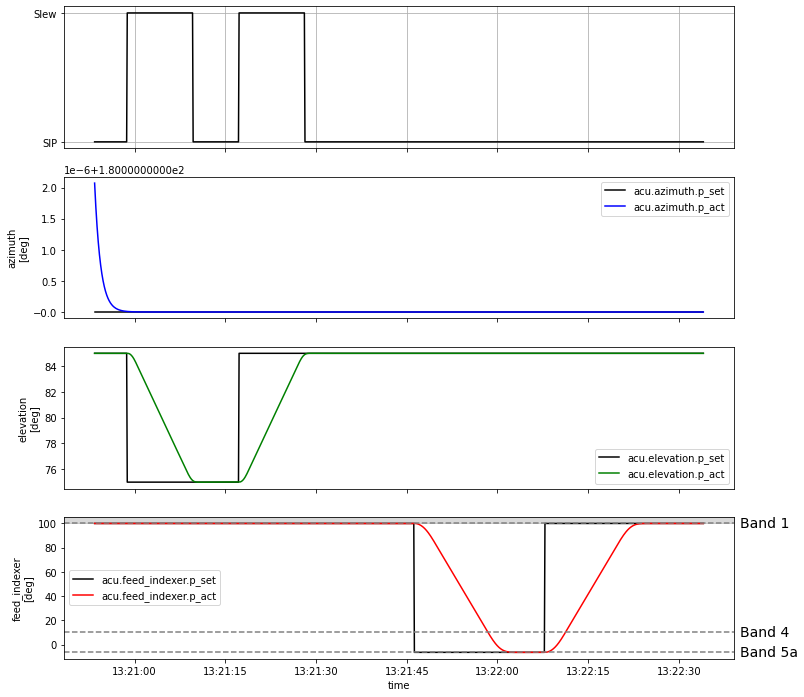

In [9]:
axs = plot_motion(df)

In [10]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun

In [11]:
if mpi.is_simulator:
    t0 = mpi.telescope.t_internal
else:
    t0 = Time.now()

In [12]:
if mpi.is_simulator:
    dfh = mpi.get_history_df(interval_ms = None)
    axs = plot_motion(dfh)

In [13]:
# df2

In [14]:
def printsize(df):
    bts = sys.getsizeof(df)
    sizes = [bts  / (10**(3*i)) for i in range(3)]
    s = '{} bytes = {:.3f} kB = {:.5f} MB ~ {:.1f}GB'.format(bts, *sizes)
    print(s)
    

In [15]:
printsize(df)

593887 bytes = 593887.000 kB = 593.88700 MB ~ 0.6GB


## Test a Track Table

In [16]:
def get_pos_now(source, t0 = Time.now()):
    mpi_lat = '-30:43:04.7'
    mpi_lon = '21:24:46.9'
    mpi_alt = 1086.0
    observer = EarthLocation(lat=mpi_lat, lon=mpi_lon, height=mpi_alt)
    altaz = source.transform_to(AltAz(obstime=t0,location=observer))
    az, el = float(altaz.az.value) % 360, float(altaz.alt.value)
    
    if az <= -270:
        az += 360
        
    if az >= 270:
        az -= 360
        
    return az, el

def mk_dummy_table(source, t0 = Time.now(), duration_s = 1000, dt = 1.0):
    time = t0 + np.arange(0, duration_s, dt) * u.s

    mpi_lat = '-30:43:04.7'
    mpi_lon = '21:24:46.9'
    mpi_alt = 1086.0
    observer = EarthLocation(lat=mpi_lat, lon=mpi_lon, height=mpi_alt)

    altaz = source.transform_to(AltAz(obstime=time,location=observer))

    t, az, el = np.array(time.mjd), np.array(altaz.az), np.array(altaz.alt)
    
    if np.min(az) <= -270:
        az += 360
        
    if np.max(az) >= 270:
        az -= 360
        
    return t, az, el


SOURCE FOUND IS:  <SkyCoord (ICRS): (ra, dec) in deg
    (115.88494452, -28.41088575)> (253.2387283632131, 31.184588801123706)
[2022-07-18 15:28:52.02Z - sculib] abs az: 251.3254 vel: 3.0000
[2022-07-18 15:28:52.04Z - sculib] abs el: 26.9006 vel: 1.0000
[2022-07-18 15:28:54.59Z - sculib] wait for acu.azimuth.p_act: 251.325 (currently at: 251.942)
[2022-07-18 15:28:56.46Z - sculib]   -> done
[2022-07-18 15:28:58.15Z - sculib] wait for acu.elevation.p_act: 26.901 (currently at: 27.214)
[2022-07-18 15:28:59.18Z - sculib]   -> done
[2022-07-18 15:29:00.85Z - sculib] wait for 5.0s
[2022-07-18 15:29:05.85Z - sculib]   -> done
59778.64520667471
[2022-07-18 15:29:05.92Z - sculib] acu ska track
>>>>>>>>>>>>>> DEBUG!!!!!!!!
59778.645206674708 251.303975 26.853553 1 0.000000 
59778.645218248785 251.302423 26.850151 1 0.000000 
59778.645229822861 251.300872 26.846749 1 0.000000 
59778.645241396931 251.299321 26.843347 1 0.000000 
59778.645252971008 251.297769 26.839944 1 0.000000 
59778.6452645450

<Response [200]>

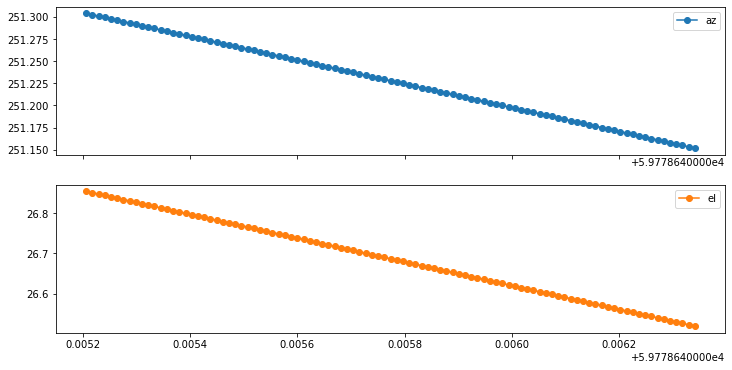

In [25]:
duration = 99


    
sources = ["1 Aur", "1 Gem", "1 Pup", "1 Sgr", "1 Vul", "10 Leo", "10 LMi", "10 Tau", "11 Com", "2 Mon", "71 Oph", "61 Vir", "41 Ari", "31 Ori", "106 Her", "2 Aur", "3 Cen", "41 Com", "70 Peg", "71 Tau", "11 Ori", "111 Tau", "21 Lyn", "12 Com", "102 Her", "72 Leo", "14 Com", "104 Her", "110 Her", "110 Vir", "111 Her", "140 Pup", "2 Cen", "2 Cet", "2 Sex", "2 Sgr", "20 Boo", "20 Cet", "20 CVn", "20 Mon", "20 Oph", "20 Pup", "28 Mon", "29 CMa", "30 LMi", "30 Oph", "31 Leo", "31 Com", "31 Boo", "31 Lyn", "21 LMi", "4 Aql", "4 Pup", "40 Leo", "42 Lib", "42 Her", "23 Ori", "13 Pup", "14 Aur", "15 Ori", "145 CMa", "16 Aur", "26 UMa", "27 Psc", "3 Cet", "30 Psc", "41 And", "5 Ser", "51 Her", "51 And", "33 Psc", "36 UMa", "46 Cet", "57 Gem", "27 Mon", "27 Lyn", "47 Psc", "6 Cet", "6 CMi", "60 Eri", "7 Cet", "70 Aql", "83 UMa", "24 Com A", "24 CVn", "74 Oph", "16 Com", "36 Oph", "39 Cru", "4 Sgr", "5 CVn", "6 CVn", "60 Her", "60 Sgr", "69 Vir", "109 Her", "7 Com", "70 Vir", "9 Boo", "9 Hya", "9 Vul", "A Boo", "a Car", "a Cen", "A Cen", "a Hya", "A Pup", "a Pup", "a Vel", "Acamar", "Achernar", "Acrux", "Acubens", "Adhafera", "Adhil", "Ain", "Al Na'ir", "Al Niyat", "Albali", "Alchiba", "Alcor", "Aldebaran", "Algedi", "Algenib", "Algieba", "Algol", "Algorab", "Alioth", "Alkaid", "Alkalurops", "Alnasl", "Alphard", "Alphecca", "Alpheratz", "Alshain", "Altair", "Alterf", "Aludra", "Alula Australis", "Alula Borealis", "Alya", "Ankaa", "Antares", "Arcturus", "Arkab", "Ascella", "Asellus Australis", "Asellus Borealis", "Atria", "b Gem", "b Leo", "b Oph", "b Pup", "b Sco", "b Sgr", "b Vel", "b1 Car", "Baten Kaitos", "Beid", "Bellatrix", "Betelgeuse", "BH CVn", "Botein", "c Boo", "c Car", "C Hya", "c Leo", "c Oph", "c Pup", "c Sgr", "C Vel", "c Vel", "c Vir", "c1 Cen", "c2 Sco", "Canopus", "Castor", "Cebalrai", "Chara", "Chertan", "Cor Caroli", "CU Vir", "Cujam", "Cursa", "d Boo", "d Car", "d Cen", "D Hya", "d Oph", "d Sco", "d Sgr", "d Vel", "Dabih", "Deneb Kaitos", "Denebola", "e Aql", "e Boo", "e Cen", "e Eri", "e Lup", "e Oph", "e Ori", "e UMa", "e Vel", "Elnath", "ET Vir", "f Aql", "f Car", "F Cen", "f Cen", "f Gem", "F Hya", "f Lup", "f Sgr", "f Tau", "f UMa", "G Cen", "g Eri", "g Gem", "g Her", "g Lup", "G Sco", "g Sgr", "g Vel", "Gacrux", "Gienah", "Girtab", "Gomeisa", "GX Vel", "GZ Vel", "h Car", "h Eri", "h Her", "H Pup", "H Sco", "h1 Pup", "h2 Sgr", "Hadar", "L2 Pup", "h2 Pup", "HIP 7918", "HIP 7999", "HIP 27890", "HIP 31407", "HIP 33357", "HIP 35205", "HIP 35384", "HIP 35727", "HIP 36431", "HIP 36795", "HIP 38500", "HIP 38901", "HIP 39095", "HIP 39138", "HIP 39690", "HIP 39903", "HIP 44700", "HIP 47029", "HIP 51438", "HIP 51658", "HIP 52502", "HIP 52736", "HIP 59856", "HIP 62327", "HIP 68191", "HIP 70104", "HIP 81724", "HIP 83336", "HIP 83430", "HIP 85365", "HIP 89678", "HIP 92024", "HIP 92088", "HIP 98761", "HIP 98842", "HY Vel", "i Car", "i Cen", "i Lup", "I Pup", "i Sco", "i Vel", "J Cen", "j Cen", "J Pup", "j Pup", "k Aqr", "K Cen", "k Hya", "k Sco", "Kaus Australis", "Kaus Borealis", "Kaus Media", "Kornephoros", "KQ Pup", "l Aql", "l Cen", "l Hya", "l Pup", "l Vir", "L1 Pup", "Lesath", "m Car", "m Cen", "M Cen", "m Tau", "M Vel", "m Vel", "m Vir", "Maasym", "Marfik", "Markeb", "Marsic", "Mekbuda", "Menkent", "Merak", "Mesartim", "Miaplacidus", "Mimosa", "Mirach", "Mizar", "Mothallah", "Muhlifain", "Muliphein", "Muphrid", "n Cen", "N Sco", "n Tau", "n Vel", "N Vel", "n1 Pup", "Naos", "Nekkar", "Nihal", "NU Pav", "o Ori", "o Tau", "o Vir", "p Cen", "p Vel", "Peacock", "Phecda", "Pollux", "Porrima", "Procyon", "q Car", "q Pup", "Q Pup", "Q Sco", "r Car", "r Pup", "Rasalas", "Rasalgethi", "Rasalhague", "Regor", "Rigel", "Rigil Kentaurus", "Rukbat", "s Eri", "Sabik", "Seginus", "Shaula", "Sheliak", "Spica", "Subra", "Suhail", "Syrma", "Talitha", "Tania Australis", "Tania Borealis", "Tureis", "u Car", "u Her", "U Hya", "Unukalhai", "v Cen", "v Eri", "V Pup", "Vega", "Vindemiatrix", "w Car", "w Cen", "w Pup", "w Vel", "Wasat", "x Car", "x Vel", "y Eri", "Yed Posterior", "Yed Prior", "z Car", "Zaniah", "Zavijava", "Zosma", "Zubeneschamali", "α Ara", "α Cha", "α Com", "α Hyi", "α Ind", "α Lup", "α Lyn", "α Mic", "α Mon", "α Mus", "α Pic", "α Pyx", "α Ret", "α Scl", "α Sct", "α Tel", "α Tuc", "α Vol", "α Vul", "β Aps", "β Ara", "β Cha", "β Cir", "β Cnc", "β Com", "β CrA", "β Crt", "β Crv", "β Dor", "β Gru", "β Hor", "β Hya", "β Hyi", "β Ind", "β Lup", "β Mus", "β Oct", "β Pav", "β Phe", "β Pic", "β Pyx", "β Ret", "β Sct", "β Ser", "β Vol", "β1 Tuc", "γ CMi", "γ CrB", "γ Crt", "γ Pav", "γ Phe", "γ Pic", "γ Pyx", "γ Ret", "γ Sct", "γ TrA", "γ Tuc", "γ1 Sgr", "γ1 Nor", "δ And", "δ Aql", "δ CrB", "δ Crt", "δ Eri", "δ For", "δ Hya", "δ Nor", "δ Phe", "δ PsA", "δ Psc", "δ Scl", "δ Ser", "δ Sge", "δ1 Tel", "δ1 Gru", "κ1 Lup", "ζ1 Sco", "κ1 Tau", "ξ1 Sgr", "κ1 Cet", "δ1 Tau", "β2 Tuc", "γ Aps", "γ Ara", "γ Cha", "γ Cir", "γ Com", "γ Gru", "γ Her", "γ Hyi", "γ Mic", "γ Mus", "γ Oph", "γ2 Vol", "γ2 Nor", "δ Ara", "δ Boo", "δ Cen", "δ Cir", "δ Cru", "δ Dor", "δ Her", "δ Hyi", "δ Ind", "δ Lib", "δ Lup", "δ Oct", "δ Pav", "δ Pic", "δ Pyx", "δ Ret", "δ Sct", "δ TrA", "δ Vel", "δ Vir", "δ Vol", "δ1 Aps", "δ2 Cha", "δ2 Lyr", "46 LMi", "37 LMi", "47 UMa", "Alkes", "b Cap", "HIP 35020", "HIP 35226", "HIP 36514", "HIP 36917", "HIP 36942", "HIP 37229", "HIP 37606", "HIP 51523", "HIP 51979", "HIP 52102", "HIP 91918", "m Pup", "NV Pup", "p Car", "ε And", "ε Ant", "ε Cen", "ε Cir", "ε CMi", "ε CrA", "ε CrB", "ε Crt", "ε Cru", "ε Crv", "ε Eri", "ε Gru", "ε Her", "ε Hyi", "ε Ind", "ε Lep", "ε Lib", "ε Lup", "ε Mic", "ε Mus", "ε Nor", "ε Pav", "ε Phe", "ε PsA", "ε Psc", "ε Ret", "ε Sco", "ε Sct", "ε Ser", "ε Tel", "ε TrA", "ε Tuc", "ζ And", "ζ Aps", "ζ Aql", "ζ Ara", "ζ Boo", "ζ Cap", "ζ CrA", "ζ Cru", "ζ Dor", "ζ Gru", "ζ Her", "ζ Hya", "ζ Hyi", "ζ Ind", "ζ Lup", "ζ Mon", "ζ Oph", "ζ Pav", "ζ Pyx", "ζ Scl", "ζ Sct", "ζ Tel", "ζ TrA", "ζ Tuc", "ζ Vir", "ζ Vol", "ζ1 CrB", "ζ1 Lyr", "η And", "η Aps", "η Aql", "η Ara", "η Cen", "η Cet", "η Cru", "η Crv", "η Gru", "η Her", "η Hya", "η Ind", "η Leo", "η Lup", "η Nor", "η Ori", "η Pav", "η Phe", "η Scl", "η Sco", "η Sct", "η Ser", "η Sgr", "η Tel", "η Tuc", "φ1 Ori", "η2 Dor", "η2 Hyi", "θ Aql", "θ Cet", "θ Crt", "θ Hya", "θ Lib", "θ Lup", "θ Pyx", "θ UMa", "ι Aql", "ι Aqr", "ι Cen", "ι Cet", "ι Cnc A", "ι CrB", "ι Gem", "ι Gru", "ι Hya", "ι Lep", "ι Sgr", "ι Tel", "ι1 Sco", "ι1 Lib", "δ2 Gru", "24 Cap", "58 Leo", "HIP 28991", "HIP 40096", "HIP 44599", "HIP 46880", "HIP 57439", "HIP 57443", "HIP 57696", "κ Aql", "κ CrB", "κ Gem", "κ Leo", "κ Lib", "κ Phe", "κ Ser", "κ UMa", "κ Vir", "λ Aqr", "λ Aur", "λ Cen", "λ Eri", "λ Gem", "λ Lep", "λ Lib", "λ Mus", "λ Ser", "μ Aql", "ν Aql", "ξ Aur", "υ1 Cen", "ν1 Sgr", "λ1 Phe", "p2 Leo", "θ2 Ser", "κ2 Boo", "ξ2 Cen", "ξ2 Sgr", "ξ2 Cet", "θ2 Tau", "φ2 Ori", "τ2 Lup", "V533 Car", "V863 Cen", "53 Vir", "13 Mon", "63 Aur", "24 Per", "V415 Car", "V345 Car", "V795 Cen", "45 Eri", "16 Pup", "46 UMa", "V656 Her", "16 Per", "17 Per", "58 Oph", "Azha", "b Tau", "c Tau", "V518 Car", "19 Pup", "Avior", "V1019 Cen", "HIP 15219", "HIP 15416", "HIP 15549", "HIP 17797", "HIP 21029", "HIP 26736", "HIP 32855", "HIP 47592", "HIP 48559", "HIP 64408", "HIP 64540", "HIP 64583", "HIP 64820", "HIP 69191", "HIP 87220", "HIP 87846", "HIP 87936", "HIP 88788", "HIP 88839", "HIP 116602", "I Hya", "k Car", "k Per", "k Vel", "Keid", "l Car", "l Per", "l Vel", "L Vel", "Maia", "Menkar", "Menkib", "Merope", "Mirfak", "o Per", "Saiph", "Sham", "Tarazed", "Taygeta", "Tejat", "Theemin", "V810 Cen", "Wazn", "Wezen", "Zaurak", "Zibal", "Zubenelgenubi", "α Aps", "α Cae", "α Cir", "α Hor", "β Cae", "β For", "β Mon", "β Scl", "β Sge", "β TrA", "γ Col", "γ Dor", "γ Hya", "γ Lep", "γ Lib", "γ Lup", "γ Mon", "γ Per", "γ Psc", "γ Ser", "γ Tau", "δ Cet", "δ Col", "δ Lep", "δ Mon", "ε Aur", "ε Col", "ε Leo", "ε Mon A", "ε Per", "ζ Ari", "ζ Aur", "ζ Lep", "ζ Per", "ζ Ser", "η Aur", "η Col", "η Lep", "η Mus", "η Per", "θ Ara", "θ Aur", "θ Boo", "θ Cap", "θ Car", "θ Cha", "θ CMa", "θ Col", "θ CrA", "θ Dor", "θ Gem", "θ Her", "θ Lep", "θ Oct", "θ Oph", "θ PsA", "θ Psc", "θ1 Cru", "θ1 Tau", "δ2 Tau", "ι Ant", "ι Aur", "ι Boo", "ι CMa", "ι Cru", "ι Eri", "ι Her", "ι Lup", "ι Per", "ι Phe", "ι PsA", "ι Psc", "ι Ret", "ι1 Mus", "θ1 Sgr", "θ2 Cru", "ι2 Sco", "72 Oph", "93 Leo", "93 Her", "95 Her", "66 Oph", "67 Oph", "98 Her", "89 Vir", "69 Aql", "Alnair", "AW CVn", "B Cen", "κ Aur", "κ Cen", "κ Cha", "κ Col", "κ Eri", "κ Lyr", "κ Nor", "κ Oph", "κ Pav", "κ Per", "κ Psc", "κ Pyx", "κ Ret", "κ Sco", "λ Aql", "λ Ara", "λ Boo", "λ Cet", "λ CMa", "λ Col", "λ Cru", "λ Gru", "λ Lup", "λ Lyr", "λ Pav", "λ Per", "λ Psc", "λ Pyx", "λ Tau", "λ Tel", "λ Vir", "μ And", "μ Aqr", "μ Aur", "μ Cen", "μ Cet", "μ Eri", "μ Her", "μ Lep", "μ Lup", "μ Mus", "μ Nor", "μ Oph", "μ Per", "μ Phe", "μ PsA", "μ Psc", "μ Ser", "μ Sgr", "μ Tau", "μ Vel", "μ Vir", "μ1 Cru", "μ1 Sco", "ε1 Ara", "36 Com", "δ Mus", "ι Oph", "μ2 Sco", "ζ2 Sco", "ν And", "ν Aur", "ν Cap", "ν Cen", "ν Cet", "ν Eri", "ν For", "ν Gem", "ν Hya", "ν Hyi", "ν Oct", "ν Oph", "ν Ori", "ν Pav", "ν Per", "ν Phe", "ν Psc", "ν Pup", "ν Sco", "ν Ser", "ν Tau", "ν Tuc", "ν Vir", "ν1 Boo", "ξ Col", "ξ Leo", "ξ Ori", "ξ Psc", "ξ1 CMa", "ο Boo", "ο Col", "ο Gem", "ο Her", "ο Hya", "ο Lup", "ο Psc", "ο Pup", "ο Sco", "ο Ser", "ο Sgr", "ο Tau", "ο Vel", "ο Vir", "ο1 Ori", "ο1 CMa", "ξ2 CMa", "ν2 CMa", "π And", "π Aur", "π Cen", "π Cet", "π Eri", "π Her", "π Hya", "π Lup", "π Pav", "π Per", "π Sco", "π Ser", "π Sgr", "π Tau", "π Vir", "τ1 Eri", "b1 Aqr", "π1 Boo", "π1 Ori", "ν2 Sgr", "ν2 Boo", "12 Per", "π2 Ori", "ο2 Ori", "τ2 Eri", "113 Her", "i Aql", "Nunki", "Sulafat", "α CrA", "γ CrA", "δ CrA", "ε Aql", "ξ Aql", "ξ CrB", "ξ Her", "ξ Hya", "ξ Oph", "ξ Pav", "ξ Pup", "ξ Sco", "ξ Ser", "ξ Tel", "ξ Vir", "ξ1 Cen", "V831 Cen", "ρ Boo", "ρ Cen", "ρ Cet", "ρ Gem", "ρ Gru", "ρ Her", "ρ Hya", "ρ Leo", "ρ Lup", "ρ Oph", "ρ Pav", "ρ Per", "ρ Sco", "ρ Ser", "ρ Tau", "ρ Vir", "ρ1 Sgr", "σ Ara", "σ Aur", "σ Boo", "σ Cen", "σ Cet", "σ Gem", "σ Her", "σ Hya", "σ Leo", "σ Lib", "σ Lup", "σ Oph", "σ Per", "σ Pup", "σ Ser", "σ Vir", "τ And", "τ Aqr", "τ Boo", "τ Cen", "τ Cet", "τ CMa", "τ CrB", "τ Her", "τ Leo", "τ Lib", "τ Oph", "τ Ori", "τ Per", "τ PsA", "τ Psc", "τ Pup", "τ Sco", "τ Sgr", "τ Vir", "τ1 Hya", "τ1 Lup", "11 Lib", "τ3 Eri", "15 CMa", "17 Mon", "30 Gem", "Alhena", "π CMa", "σ CMa", "τ Aur", "τ Gem", "υ Aur", "υ Boo", "υ Ori", "υ PsA", "υ Sgr", "φ Eri", "χ Aur", "χ Eri", "ψ Boo", "ψ Cap", "ψ Cen", "ψ Eri", "ψ Hya", "ψ Oph", "ψ Phe", "ψ Sco", "ψ Sgr", "ψ UMa", "ψ Vel", "ψ Vir", "ω1 Aqr", "ψ1 Lup", "υ2 Hya", "υ2 Cen", "ψ10 Aur", "ω2 Aqr", "τ2 Hya", "σ2 Tau", "ψ2 Lup", "ψ2 Aur", "π3 Ori", "54 Per", "104 Aqr", "τ4 Eri", "54 Eri", "υ4 Eri", "π4 Ori", "64 Eri", "ψ4 Aur", "65 And", "75 Tau", "π5 Ori", "26 Hya", "π6 Ori", "56 Ori", "136 Tau", "27 Hya", "37 Tau", "58 Per", "18 Mon", "19 Psc", "9 Aur", "Alcyone", "Aspidiske", "Atlas", "b And", "b Per", "b2 Aqr", "c Per", "d Per", "Electra", "f Per", "g Car", "G Hya", "HIP 16147", "HIP 26199", "HIP 31827", "Mebsuta", "Phact", "Sirius", "α Dor", "ζ Tau", "ι Ori", "κ CMa", "ξ Gem", "ξ1 Cet", "14 Ari", "35 Ari", "56 Cet", "58 And", "39 Ari", "Almach", "Alrescha", "Hamal", "Sheratan", "β Tri", "γ Cet", "γ Tri", "δ Tri", "θ Per", "κ Ari", "λ Ari", "σ Ori", "ψ7 Aur", "27 CMa", "τ9 Eri", "HIP 23362", "HIP 23430", "HIP 48615", "HIP 50847", "HIP 50954", "Q Vel", "q Vel", "r Vel", "Regulus", "s Car", "V399 Car", "HIP 51495", "α Ant", "α Sex", "ι Tau", "λ Hya", "μ Hya", "π Leo", "υ And", "υ Car", "υ Cet", "υ Gem", "υ Her", "υ Leo", "υ Lib", "υ Psc", "υ Tau", "υ UMa", "υ1 Hya", "ν1 Lup", "υ1 Eri", "υ2 Eri", "τ5 Eri", "τ6 Eri", "τ8 Eri", "φ Aqr", "φ Cen", "φ Gem", "φ Her", "φ Hya", "φ Leo", "φ Oph", "φ Psc", "φ Sgr", "φ Tau", "φ Vel", "φ1 Lup", "φ1 Pav", "χ And", "χ Aqr", "χ Car", "χ Cen", "χ Cet", "χ Gem", "χ Her", "χ Leo", "χ Lup", "χ Oph", "χ Peg", "χ Psc", "χ UMa", "χ Vir", "χ1 Hya", "χ1 Sgr", "ψ Peg", "ψ Per", "ψ1 Ori", "χ1 Ori", "φ1 Cet", "ψ1 Aqr", "ψ1 Aur", "β2 Sgr", "32 Ori", "c2 Aqr", "χ2 Ori", "ο2 CMa", "ψ2 Aqr", "ψ3 Aqr", "134 Tau", "55 Peg", "55 UMa", "56 UMa", "17 Lep", "119 Tau", "139 Tau", "19 Mon", "Adhara", "Alnilam", "Alnitak", "Arneb", "b Ori", "c Ori", "Capella", "d Ori", "e Leo", "f1 Ori", "Fomalhaut", "Furud", "g Aqr", "HIP 28413", "HIP 28675", "HIP 29735", "HIP 30093", "HIP 55588", "HIP 56986", "k Ori", "Meissa", "Menkalinan", "Mintaka", "Mirzam", "Situla", "Skat", "β PsA", "β Psc", "γ PsA", "γ Scl", "δ Aur", "ω And", "ω Boo", "ω Cap", "ω Car", "ω CMa", "ω Eri", "ω Hya", "ω Lup", "ω Oph", "ω Ori", "ω Per", "ω Psc", "ω Sgr", "ω Tau", "ω UMa", "ω1 Sco", "α2 Cen", "c2 Cen", "φ2 Lup", "β2 Sco", "ω2 Sco", "q2 Eri", "34 Boo", "16 Lib", "37 Lib", "48 Lib", "109 Vir", "CL Dra", "Dschubba", "E Hya", "Graffias", "HIP 9095", "HIP 71865", "HIP 78323", "HIP 78650", "HIP 78655", "Izar", "k Lup", "Nusakan"]
src = None
for i in sources:
    srci = SkyCoord.from_name(i)
    az, el = get_pos_now(srci, t0 = t0)
    if el > 30:
        source = srci
        break
        
print('SOURCE FOUND IS: ', source, (az, el))

if mpi.is_simulator:
    t0 = mpi.telescope.t_internal
else:
    t0 = Time.now()

az, el = get_pos_now(source, t0 = t0)
mpi.abs_azimuth(az, az_speed)
mpi.abs_elevation(el, el_speed)
mpi.wait_settle()
mpi.wait_duration(wait5)

if mpi.is_simulator:
    t0 = mpi.telescope.t_internal
else:
    t0 = Time.now()

print(t0.mjd)
t, az, el = mk_dummy_table(source, t0 = t0, duration_s=duration)

dft = pd.DataFrame( dict(az=az, el=el), index=t)
dft.plot(subplots=True, figsize=(12,6), style ='-o')
plt.suptitle(src)

# mpi.debug=True
mpi.upload_track_table(t, az, el)
# mpi.debug=False

# Start data recording
if mpi.logger_state() == 'RECORDING':
    print('WARNING, already recording - attempting to stop and start a fresh logger')
    mpi.stop_logger() 
    mpi.wait_duration(wait5)
if mpi.logger_state() == 'STOPPED':
    mpi.start_logger(config_name)
    mpi.wait_duration(wait5)
    

mpi.wait_duration(duration)
mpi.stop_logger()



In [ ]:
df = mpi.get_session_as_df(interval_ms = None)
axs = plot_motion(df)

In [ ]:
if mpi.is_simulator:
    dfh = mpi.get_history_df(interval_ms = None)
    axs = plot_motion(dfh)

In [ ]:
mpi.release_command_authority()